In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Минипроект

Опираясь на [карту](https://eusipa.org/wp-content/uploads/European_map_20160530_2016.pdf) Европейской ассоциации структурных инвестиционных
продуктов (EUSIPA) и ее [российскую адаптацию](https://naufor.ru/tree.asp?n=22890)

привести 2-3 ссылки на

*   структурные продукты, представленные на россиском рынке,
*   доступные наборы данных (напрмер, [HKEX](https://www.hkex.com.hk/Products/Securities/Structured-Products/Trading-Information-and-Historical-Data?sc_lang=en)).

In [2]:
## ваши ссылки

# Cтруктурный продукт с полной защитой капитала

## СП с использованием бинарных опционов

Пример. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Ожидается, что текущая цена акции, равная 100 руб., не изменится более чем на 10%. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная
ставка – 7%.

Постройте структурный продукт с полной защитой капитала и использованием опционной стратегии бинарный диапазон (binary range).

In [3]:
# оценка стоимости бинарного опциона колл
def binary_option_call(t, S, K, T, r, q, sigma):

    d1 = (np.log(S/K) + (r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if t == 'cash-or-nothing':
      return np.exp(-r*T)*norm.cdf(d2)
    if t == 'asset-or-nothing':
      return S*np.exp(-q*T)*norm.cdf(d1)

# оценка стоимости бинарного опциона пут
def binary_option_put(t, S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if t == 'cash-or-nothing':
      return np.exp(-r*T)*norm.cdf(-d2)
    if t == 'asset-or-nothing':
      return S*np.exp(-q*T)*norm.cdf(-d1)

In [4]:
S = 100
K = 100
T = 1
r = 0.07
q = 0
N = 100000
sigma = 0.3
n = 100

In [5]:
K=90
b90 = binary_option_call('cash-or-nothing', S, K, T, r, q, sigma)
K=110
b110 = binary_option_call('cash-or-nothing', S, K, T, r, q, sigma)
print('digital range = ', b90-b110)

digital range =  0.24307515482345715


In [6]:
risk_part = N - N*np.exp(-r*T)
Q = round(risk_part/(b90-b110))
print('количество опционных стратегий', Q)

количество опционных стратегий 27813


In [7]:
print('максимальная доходность, годовых = ', (N+Q)/(N*T)-1)
print('максимальная доходность, непрерывно = ', np.log((N+Q)/(N*T)))

максимальная доходность, годовых =  0.27813
максимальная доходность, непрерывно =  0.24539807222181784


In [8]:
def call(S, K, T, sigma, r, q):
    d1 = (np.log (S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)

Пример. Постройте график доходности структурного продукта в сравнении с доходностью базового актива и безрисковой ставки.

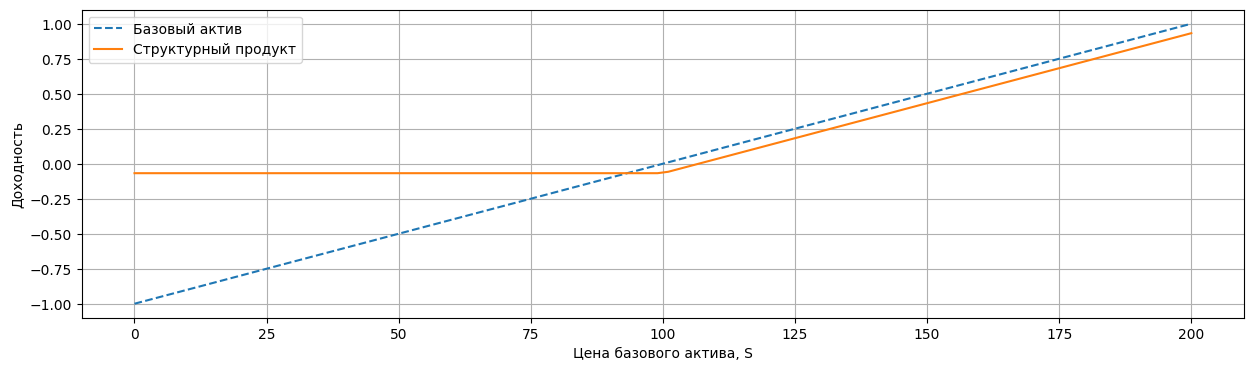

In [9]:
risk_part = N - N * np.exp(-r * T)
c = call(S, K, T, sigma, r, q)
PR = S * round(risk_part / c) / N

underlying_asset_profit = np.linspace(- S, S, n) / S
struct_product_profit = np.maximum(0, underlying_asset_profit) - round(risk_part / c) * c / N

x = np.linspace(0, 2 * S, n)
plt.figure(figsize=(15, 4))
#plt.title('Profit UA vs OC')
plt.plot(x, underlying_asset_profit, '--', label='Базовый актив')
plt.plot(x, struct_product_profit,  label='Структурный продукт')
plt.ylabel('Доходность')
plt.xlabel('Цена базового актива, S')
plt.grid()
plt.legend()
plt.show()

Пример. Постройте график зависимости коэффициента участия от встроенной комиссии, проварьируйте комиссию от 0 до 10% с шагом 1%.

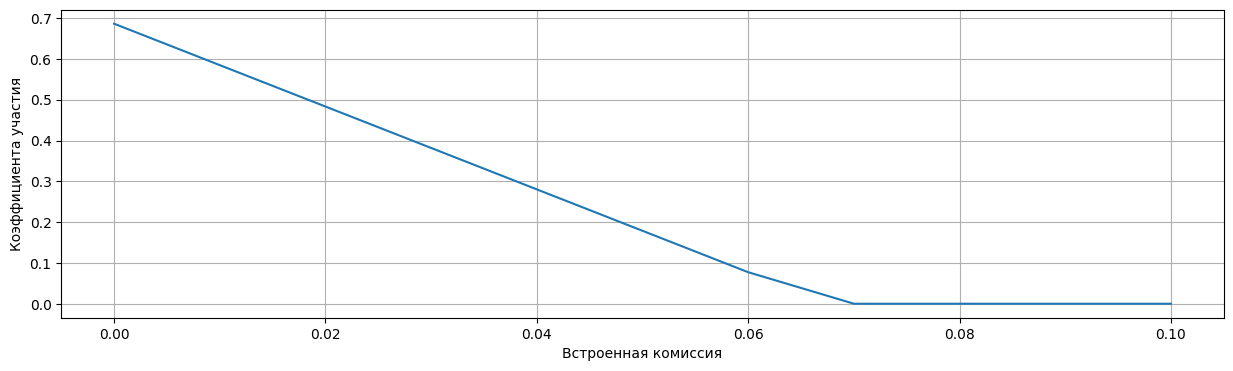

In [10]:
da = np.exp(-r * T) * N

Q = lambda fees: ( N * (1 - fees)  - da ) / c
fees = (np.linspace(0.0, 0.1, 11))
PR = K * Q(fees) / N

plt.figure(figsize=(15, 4))
#plt.title('PR from fees value')
plt.plot(fees, np.maximum(PR, 0))
plt.xlabel('Встроенная комиссия')
plt.ylabel('Коэффициента участия')
plt.grid()
plt.show()

Постройте график зависимости коэффициента участия от процентных ставок (депозитная и безрисковая ставки равны), проварьируйте ставки от 0 до 20% с шагом 1%.

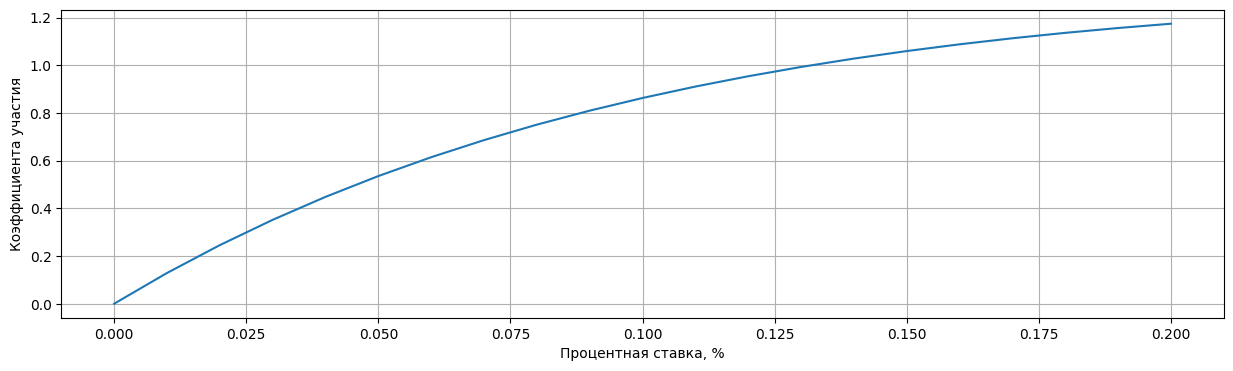

In [11]:
Q = lambda da, c: ( N * (1 - 0.0)  - da ) / c
rs = np.linspace(0, 0.2, 21)
cs = np.fromiter((call(S, K, T, sigma, ri, q) for ri in rs), dtype=np.float32)
das = np.exp(-rs * T) * N
Qs = np.fromiter((Q(da,c) for da,c in zip(das, cs)), dtype=np.float32)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
#plt.title('PR from interest rate')
plt.plot(rs, np.maximum(PR, 0))
plt.xlabel('Процентная ставка, %')
plt.ylabel('Коэффициента участия')
plt.grid()
plt.show()

### Задача

Задача. Постройте трехмерных график зависимости коэффициента участия от депозитной и безрисковой ставок, проварьируйте ставки от 0 до 25% с шагом 1%.

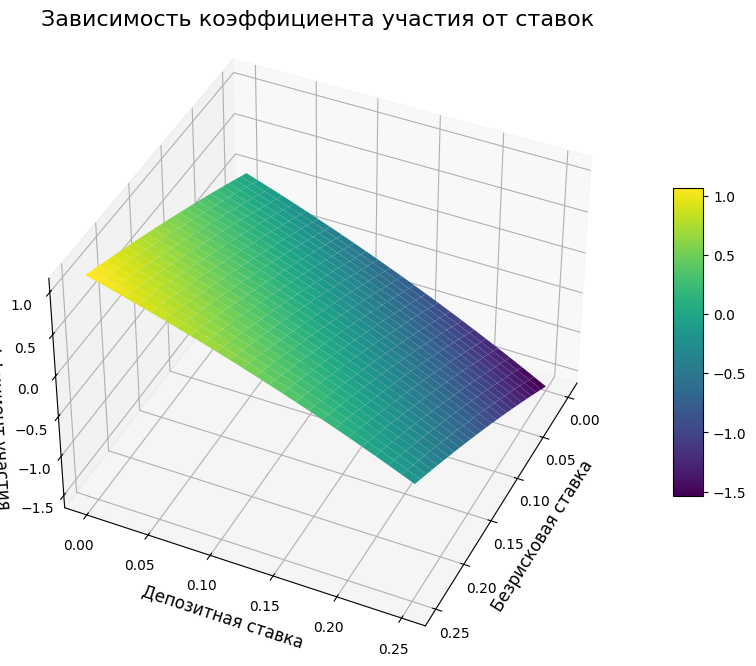

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные параметры
S = 100  # Цена актива
K = 100  # Уровень исполнения
T = 1    # Время до экспирации
sigma = 0.2  # Волатильность
N = 100  # Номинал

r_values = np.linspace(0, 0.25, 26)  # Безрисковая ставка
q_values = np.linspace(0, 0.25, 26)  # Депозитная ставка

# Матрица коэффициентов участия
participation_rates = np.zeros((len(r_values), len(q_values)))

for i, r in enumerate(r_values):
    for j, q in enumerate(q_values):
        da = np.exp(-r * T) * N  # Приведенная стоимость номинала
        c = S * np.exp(-q * T) * sigma  # Стоимость опциона (упрощенная модель)
        Q = (N * (1 - q) - da) / c  # Количество опционов
        PR = K * Q / N  # Коэффициент участия
        participation_rates[i, j] = PR

# Создание сетки для графика
X, Y = np.meshgrid(r_values, q_values)
Z = participation_rates.T

# Построение 3D-графика
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')  # Новый цвет

# Угол обзора
ax.view_init(elev=40, azim=25)

ax.set_title('Зависимость коэффициента участия от ставок', fontsize=16)
ax.set_xlabel('Безрисковая ставка', fontsize=12)
ax.set_ylabel('Депозитная ставка', fontsize=12)
ax.set_zlabel('Коэффициент участия', fontsize=12)

fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

Пример. Постройте график зависимости коэффициента участия от волатильности базового актива, проварьируйте волатильность от 0 до
100% с шагом 5%.

C:\Users\OneSmiLe\AppData\Local\Temp\ipykernel_724\102214163.py:4: RuntimeWarning: divide by zero encountered in divide
  Q = lambda c: ( N * (1 - 0.0)  - da ) / c


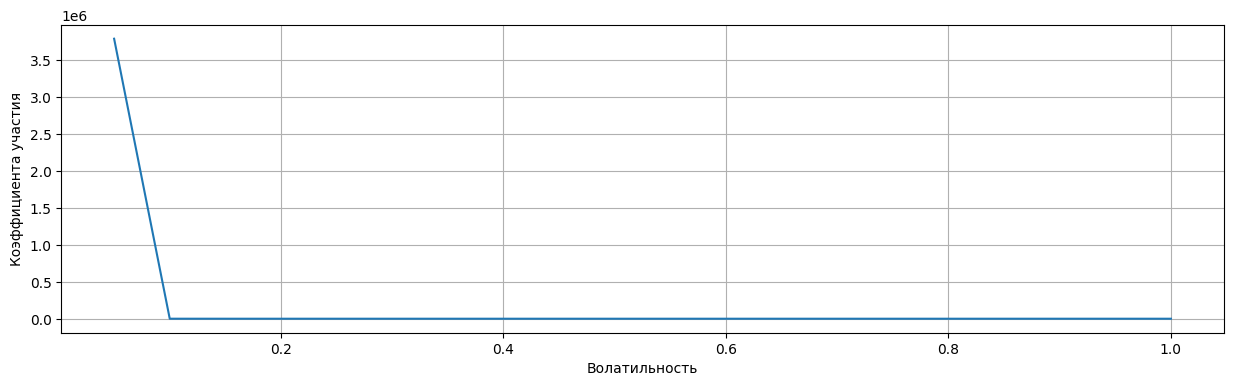

In [13]:
vs = np.linspace(1e-5, 1, 21)
cs = call(S, K, T, vs, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
Qs = Q(cs)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
#plt.title('PR from volatility')
plt.plot(vs, PR)
plt.xlabel('Волатильность')
plt.ylabel('Коэффициента участия')
plt.grid()
plt.show()

Пример. Постройте график влияния срока продукта (от 0 до 100 лет, с
шагом 6 месяцев) на соотношение безрискового и рискового вложений.

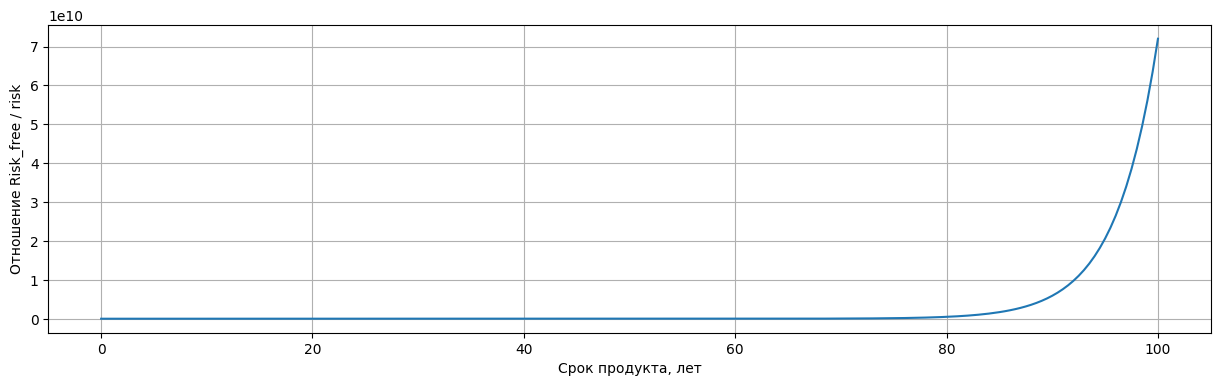

In [14]:
Ts = np.linspace(1e-5, 100, 201)
risk_parts = N - N * np.exp(-r * Ts)
ratios = risk_parts / (N - risk_parts)

plt.figure(figsize=(15, 4))
#plt.title('Risk-free to risk fraction relation on maturity date')
plt.plot(Ts, ratios)
plt.xlabel('Срок продукта, лет')
plt.ylabel('Отношение Risk_free / risk')
plt.grid()
plt.show()

Пример. Постройте график зависимости коэффициента участия от срока
продукта (от 0 до 20 лет, с шагом 6 месяцев).


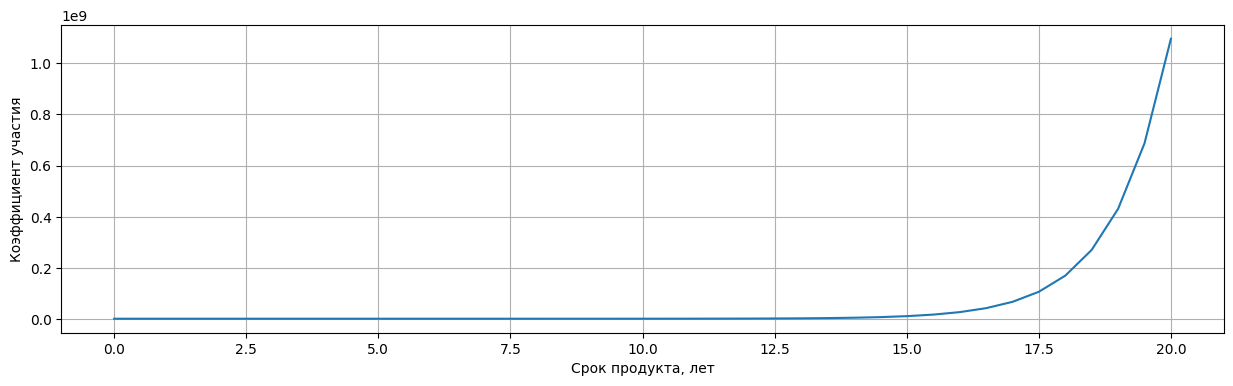

In [15]:
Ts = np.linspace(1e-5, 20, 41)
cs = call(S, K, Ts, sigma, r, q)
das = np.exp(-r * Ts) * N
Q = lambda c, d: ( N * (1 - 0.0)  - d ) / c
Qs = np.fromiter((Q(c, d) for c,d in zip(cs, das)), dtype=np.float64)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
#plt.title('PR from maturity date')
plt.plot(Ts, PR)
plt.xlabel('Срок продукта, лет')
plt.ylabel('Коэффициент участия')
plt.grid()
plt.show()

Пример. Постройте график коэффициента участия от страйка продукта
(от 80 до 140, с шагом 10).

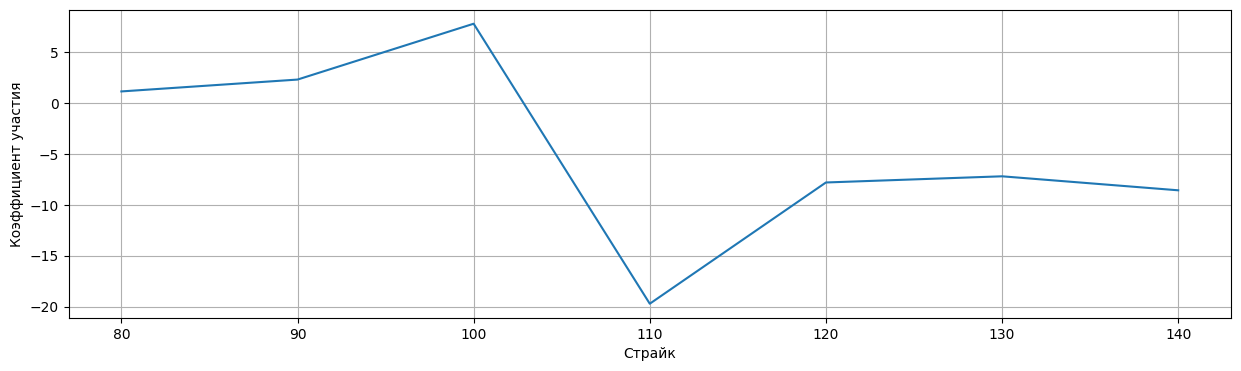

In [16]:
Ks = np.linspace(80, 140, 7)
cs = call(S, Ks, T,  sigma, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
Qs = Q(cs)
PR = np.fromiter(((Kv * Qv / N) for Kv, Qv in zip(Ks, Qs)), dtype=np.float32)

plt.figure(figsize=(15, 4))
#plt.title('PR from strike')
plt.plot(Ks, PR)
plt.xlabel('Страйк')
plt.ylabel('Коэффициент участия')
plt.grid()
plt.show()

In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Ks = np.linspace(80, 140, 7)
cs = call(S, Ks, T,  sigma, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
Qs = Q(cs)
PR = np.fromiter(((Kv * Qv / N) for Kv, Qv in zip(Ks, Qs)), dtype=np.float32)

plt.figure(figsize=(15, 4))
#plt.title('PR from strike')
plt.plot(Ks, PR)
plt.xlabel('Страйк')
plt.ylabel('Коэффициент участия')
plt.grid()
plt.show()

NameError: name 'call' is not defined

Пример. Постройте график доходности продуктов с разными страйками и
100% защитой капитала.

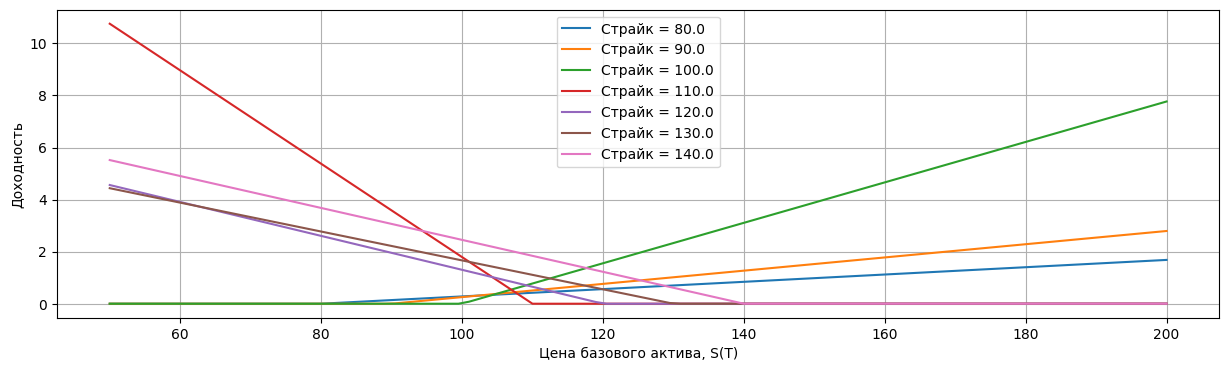

In [17]:
Ks = np.linspace(80, 140, 7)

cs = call(S, Ks, T, sigma, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da) / c
Qs = Q(cs)
# Qs = np.fromiter((Q(c) for c in zip(cs, das)), dtype=np.float64)
PR = np.fromiter(((Kv * Qv / N) for Kv, Qv in zip(Ks, Qs)), dtype=np.float32)
Sm = np.linspace(0.5*S, 2*S, 101)

plt.figure(figsize=(15, 4))
#plt.title('Profit on UA')
for i, pr in enumerate(PR):
    rs = np.maximum(0, pr * (Sm - Ks[i]) / Ks[i])
    plt.plot(Sm, rs, label=f'Страйк = {Ks[i]}')
plt.xlabel('Цена базового актива, S(T)')
plt.ylabel('Доходность')
plt.legend()
plt.grid()
plt.show()

Пример. Постройте графики доходностей продуктов с одним страйком и
разной степенью защиты капитала (от 80% до 150%, с шагом 10%)

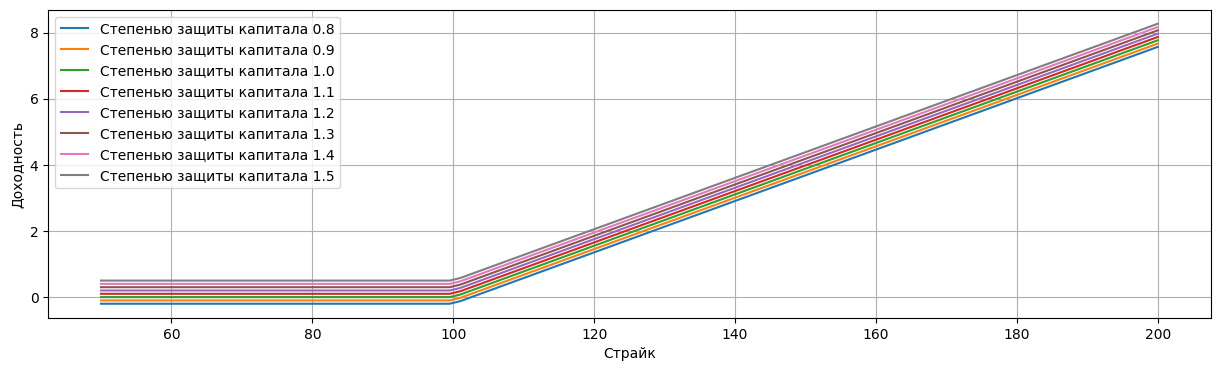

In [18]:
gs = np.linspace(0.8, 1.5, 8)
c = call(S, K, T, sigma, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
PR = K * Q(c) / N
Sm = np.linspace(0.5*S, 2*S, 101)

plt.figure(figsize=(15, 4))
#plt.title('PR from strike')
for i, g in enumerate(gs):
    returns = np.maximum(g - 1, (g - 1) + PR * (Sm - S)/S)
    plt.plot(Sm, returns, label=f'Степенью защиты капитала {g}')
plt.xlabel('Страйк')
plt.ylabel('Доходность')
plt.legend()
plt.grid()
plt.show()

### Задача

Задача. В условиях примера постройте 3D график зависимости доходности структурного продукта от

*   страйков и
*   степени защиты капитала.

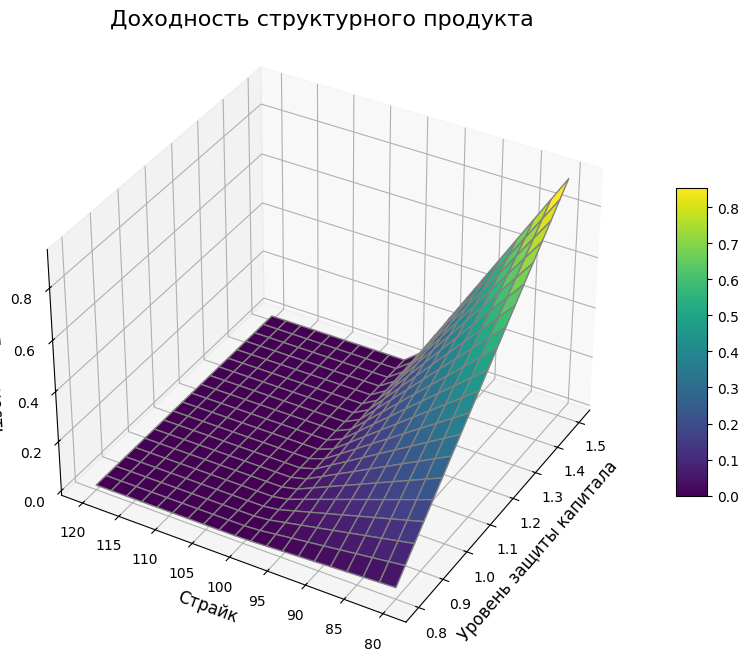

In [19]:
# Уровни защиты капитала (от 80% до 150% номинальной стоимости)
capital_protection = np.linspace(0.8, 1.5, 20)
# Уровни страйков (от 80% до 120% стоимости базового актива)
strike_levels = np.linspace(0.8 * S, 1.2 * S, 20)

# Матрица доходностей
return_matrix = np.zeros((len(strike_levels), len(capital_protection)))

for idx_strike, strike in enumerate(strike_levels):
    for idx_protection, protection in enumerate(capital_protection):
        discounted_nominal = np.exp(-r * T) * N
        call_price = S * np.exp(-r * T) * sigma
        coefficient = (N * protection - discounted_nominal) / call_price
        return_matrix[idx_strike, idx_protection] = coefficient * np.maximum(S - strike, 0) / N

# Построение 3D-графика
X, Y = np.meshgrid(capital_protection, strike_levels)
Z = return_matrix

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Цветовая карта изменена на 'viridis'
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='gray')

ax.set_title('Доходность структурного продукта', fontsize=16)
ax.set_xlabel('Уровень защиты капитала', fontsize=12)
ax.set_ylabel('Страйк', fontsize=12)
ax.set_zlabel('Доходность', fontsize=12)
ax.view_init(elev=35, azim=210)

fig.colorbar(surface, shrink=0.5, aspect=10)
plt.show()

Пример. В условиях примера для опциона колл повторите все расчеты с использованием бинарной стратегии, основанной на покупке и продаже европейского опциона пут.

Ширину диапазона доходности базового актива задать самостоятельно. Выбор обосновать.

In [20]:
S = 100
K = 100
T = 1
r = 0.07
q = 0
N = 100000
sigma = 0.3

K1 = 100
bo1 = binary_option_put('cash-or-nothing', S, K1, T, r, q, sigma)
K2=110
bo2 = binary_option_put('cash-or-nothing', S, K2, T, r, q, sigma)
print('digital range = ', -bo1+bo2)

risk_part = N - N*np.exp(-r*T)
Q = round(risk_part/(-bo1+bo2))
print('количество опционных стратегий', Q)

print('максимальная доходность, годовых = ', (N+Q)/(N*T)-1)
print('максимальная доходность, непрерывно = ', np.log((N+Q)/(N*T)))

digital range =  0.11734811871736428
количество опционных стратегий 57612
максимальная доходность, годовых =  0.57612
максимальная доходность, непрерывно =  0.45496613066900204


Пример. Постройте график функции выплат для бинарных стратегий, основанных
*   на покупке и продаже опционов колл,
*  на покупке и продаже опционов пут.



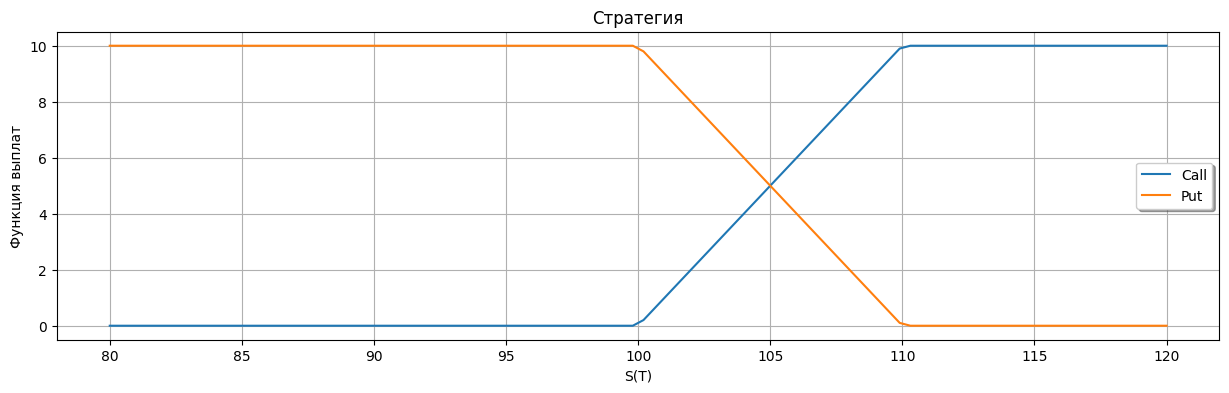

In [21]:
S = np.linspace(80, 120, 100)

C1 = np.maximum(S - K1, 0)
C2 = np.maximum(S - K2, 0)

P1 = np.maximum(-S + K1, 0)
P2 = np.maximum(-S + K2, 0)
plt.figure(figsize=(15,4))
plt.plot(S, C1 - C2, label=f'Call')
plt.plot(S, -P1 + P2, label=f'Put')
plt.legend(loc = 'best', fancybox = True, shadow = True)

plt.xlabel(f"S(T)")
plt.ylabel("Функция выплат")
plt.title("Стратегия")

plt.grid(True)
plt.show()

### Задача

Задача. Постройте графики трехмерных поверхностей для описания зависимости коэффициента участия при использовании бинарных опционов  
*   кол,
*   пут

от стоимости базового актива и количества дней до экспирации.

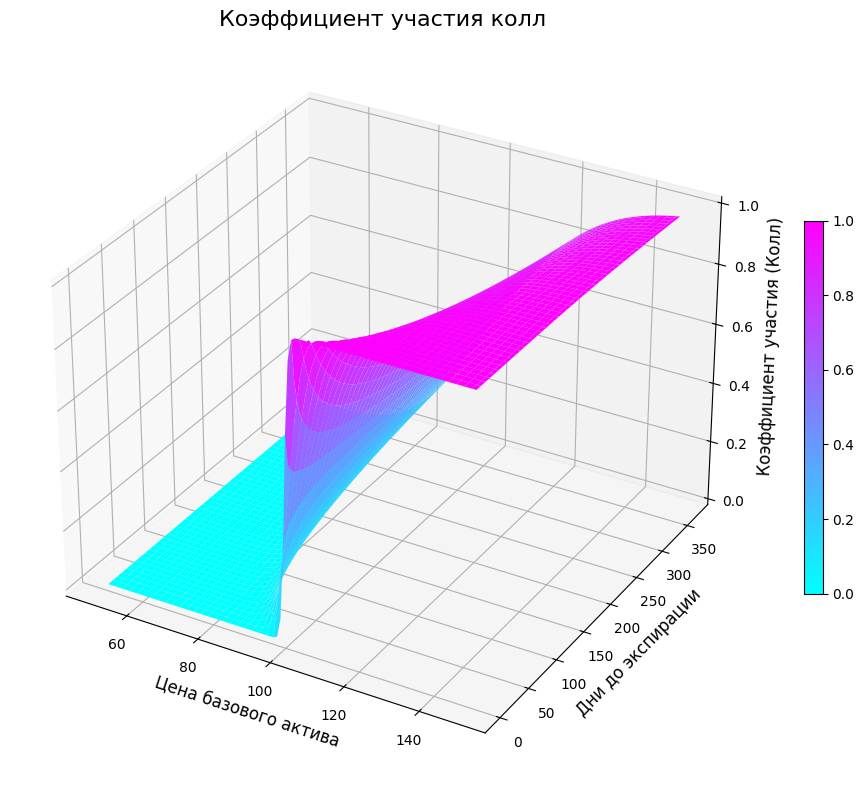

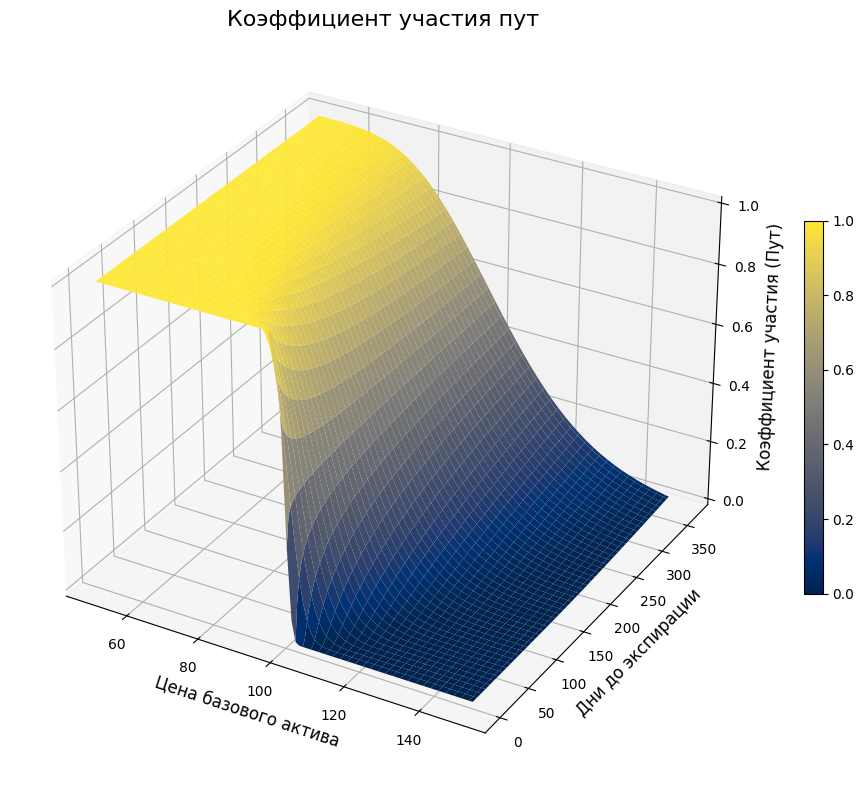

In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def calc_participation_coeff(opt_type, opt_dir, asset_price, strike_price, time_to_exp, vol):
    d1 = (np.log(asset_price / strike_price) + (0.5 * vol**2) * time_to_exp) / (vol * np.sqrt(time_to_exp))
    d2 = d1 - vol * np.sqrt(time_to_exp)
    if opt_dir == 'call':
        if opt_type == 'cash-or-nothing':
            return norm.cdf(d2)
        elif opt_type == 'asset-or-nothing':
            return norm.cdf(d1)
    elif opt_dir == 'put':
        if opt_type == 'cash-or-nothing':
            return norm.cdf(-d2)
        elif opt_type == 'asset-or-nothing':
            return norm.cdf(-d1)

def plot_surface(x, y, z, title, z_axis_label, colormap='coolwarm'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(x, y, z, cmap=colormap, edgecolor='none')
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Цена базового актива', fontsize=12)
    ax.set_ylabel('Дни до экспирации', fontsize=12)
    ax.set_zlabel(z_axis_label, fontsize=12)
    fig.colorbar(surface, ax=ax, shrink=0.5, aspect=20)
    plt.tight_layout()
    plt.show()

# Параметры
strike_price = 100
volatility = 0.2
s_min, s_max = 50, 150
days_start, days_end = 1, 365
opt_type = 'cash-or-nothing'

# Генерация сетки
asset_prices = np.linspace(s_min, s_max, 100)
days_to_expiry = np.linspace(days_start, days_end, 100)
grid_prices, grid_days = np.meshgrid(asset_prices, days_to_expiry)
grid_time_to_exp = grid_days / 365.0

# Расчет коэффициентов участия
call_participation = calc_participation_coeff(opt_type, 'call', grid_prices, strike_price, grid_time_to_exp, volatility)
put_participation = calc_participation_coeff(opt_type, 'put', grid_prices, strike_price, grid_time_to_exp, volatility)

# Построение графиков
plot_surface(grid_prices, grid_days, call_participation, "Коэффициент участия колл", "Коэффициент участия (Колл)", colormap='cool')
plot_surface(grid_prices, grid_days, put_participation, "Коэффициент участия пут", "Коэффициент участия (Пут)", colormap='cividis')

## CП с использованием гэп опционов

### Задача

Задача. Рассмотрим гэп опционы колл и пут на недивидендные акции со страйком 57 и сроком действия, истекающим 1 июля следующего года, на 1 января текущего года акции торгуются по цене 50.

Используя эти данные, вычислите цену опциона колл и пут, если безрисковая ставка равна 9%, цена страйк 50, волатильность 20%.

In [3]:
import numpy as np
from scipy.stats import norm

# Новые параметры
S0 = 50        # Текущая цена актива
K1 = 57        # Первая цена страйка
K2 = 50        # Вторая цена страйка
r = 0.09       # Процентная ставка
q = 0          # Дивидендная доходность
sigma = 0.2    # Волатильность
T = 1.5        # Время до экспирации в годах

def calculate_gap_option(price, strike1, strike2, time, rate, vol, div, option_type):
    """Расчет стоимости гэп-опциона."""
    d1 = (np.log(price / strike2) + (rate - div + vol**2 / 2) * time) / (vol * np.sqrt(time))
    d2 = d1 - vol * np.sqrt(time)
    
    if option_type == 'call':
        payoff = price * np.exp(-div * time) * norm.cdf(d1) - strike1 * np.exp(-rate * time) * norm.cdf(d2)
    elif option_type == 'put':
        payoff = strike1 * np.exp(-rate * time) * norm.cdf(-d2) - price * np.exp(-div * time) * norm.cdf(-d1)
    else:
        raise ValueError("Недопустимый тип опциона")
    
    return payoff

# Расчет цен гэп-опционов с новыми данными
call_option_price = calculate_gap_option(S0, K1, K2, T, r, sigma, q, 'call')
put_option_price = calculate_gap_option(S0, K1, K2, T, r, sigma, q, 'put')

print(f"Цена колл гэп-опциона: {call_option_price:.2f}")
print(f"Цена пут гэп-опциона: {put_option_price:.2f}")

Цена колл гэп-опциона: 4.32
Цена пут гэп-опциона: 4.12


В рамках модели Блэка-Шоулза решите следующие задачи для бинарных опционов.

Пример. Маркет-мейкер продает европейские гэп-колл опционы сумму 1000 сроком на один год и дельта-хеджирует позицию акциями.
Опцион гэп-колл выписан на одну акцию, не приносящую дивидендов. Текущая цена акции составляет 100.

Волатильность акции составляет 100\%. Каждый колл-гэп опцион  имеет цену исполнения 130, триггер цена равна  100. Безрисковая процентная ставка равна 0\%.

В рамках модели Блэка-Шоулза определите начальное количество акций для  дельта-хеджирования.

**Указание.** Определите дельту опциона и умножьте на 1000.

In [24]:
def first_derivative (f , x , args, h = 0.0001) :
    return (f(x + h, *args) - f(x - h, *args)) / (2 * h)

In [27]:
# Параметры для расчета
spot_price = 100        
strike_price_1 = 130    
strike_price_2 = 100    
interest_rate = 0.0     
volatility = 1          
time_to_expiry = 1      
dividend_yield = 0      

# Расчет стоимости опциона и его дельты
call_option_price = calculate_gap_option(spot_price, strike_price_1, strike_price_2, 
                                         time_to_expiry, interest_rate, volatility, 
                                         dividend_yield, option_type_call)

# Производная для дельты
delta_call = first_derivative(calculate_gap_option, spot_price, 
                              (strike_price_1, strike_price_2, time_to_expiry, 
                               interest_rate, volatility, dividend_yield, option_type_call))

# Результаты
call_option_price, round(delta_call * 1000)

(29.03636609302302, 586)

### Задача

Задача. В условиях примера определите начальное количество акций для дельта-хеджирования с использованием пут-гэп опционов. Выбор цены исполнения и триггер цены обосновать.

In [28]:
import numpy as np
from scipy.stats import norm

# Исходные параметры
spot_price = 135
strike_price_upper = 145
strike_price_lower = 125
time_to_maturity = 1
risk_free_rate = 0.06
volatility = 0.32
dividend_yield = 0
options_count = 100

# Расчет дельты для пут-опциона с гэпом
d1_value = (np.log(spot_price / strike_price_lower) + 
            (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
put_gap_delta = -np.exp(-dividend_yield * time_to_maturity) * norm.cdf(-d1_value)

# Расчет количества акций для дельта-хеджирования
initial_shares = -put_gap_delta * options_count

# Вывод результатов
print(f"Дельта для пут-опциона с гэпом: {put_gap_delta:.4f}")
print(f"Начальное количество акций для хеджирования: {initial_shares:.2f}")

Дельта для пут-опциона с гэпом: -0.2783
Начальное количество акций для хеджирования: 27.83


Пример. Безрисковая процентная ставка составляет 6%, волатильность бездивидендных акций составляет 32%. Четырехлетний опцион пут «деньги или ничего» на эту акцию с триггерной ценой 135 имеет премию 0,32494. Найдите цену 4-летнего опциона колл «актив или ничего» на эту акцию с триггерной ценой 135.

In [ ]:
r = 0.06
sigma = 0.32
T = 4
K = 135
q = 0
put = 0.32494
put_type = 'cash-or-nothing'

opt_func = lambda x: binary_option_put(put_type, x, K, T, r, q, sigma) - put
S = fsolve(opt_func, K)[0]

call_type = 'asset-or-nothing'
call = binary_option_call(call_type, S, K, T, r, q, sigma)
call

120.75083564309931

Пример. Волатильность базового актива 25%, волатильность годового опциона колл со страйком 50 на акции составляет 120,68%. Маркет-мейкер выписывает один опцион колл и дельта хеджирует свою позицию. Стоимость акции в хеджирующем портфеле равна 34,74. Найдите цену годового опциона «деньги или ничего» колл на акцию с триггерной ценой 50.

In [ ]:
r = 0.00
sigma_S = 0.25
sigma_call = 1.2068
K = 50
T = 1
K2 = 50
S_hedge = 34.74
q = 0
call_type = 'cash-or-nothing'
call = binary_option_call(call_type, S_hedge, K, T, r, q, sigma_S)
call

0.05687902614969493

### Задача

Задача. На акции по текущей цене 75 выплачивают дивиденды по ставке 2% (непрырывное начисление), волатильность акций 40%. Коэффициент Шарпа для акции равен 0. Шестимесячный опцион «актив или ничего» колл на акцию с триггером 80 стоит 36,65.

Рассчитайте вероятность того, что опцион колл «актив или ничего» будет исполнен.

В условиях примера проанализируйте зависимость вероятности исполнения опциона колл «актив или ничего» от коэффициента Шарпа.

Приведите иллюстративные графики.

In [30]:
t = 1/2
S0 = 75
sigma = 0.4
q = 0.02
sharpe = 0.0
r = np.abs(sharpe - q)
c = 36.65
K2 = 80

Вероятность исполнения опциона при Шарпе 0: 0.3018


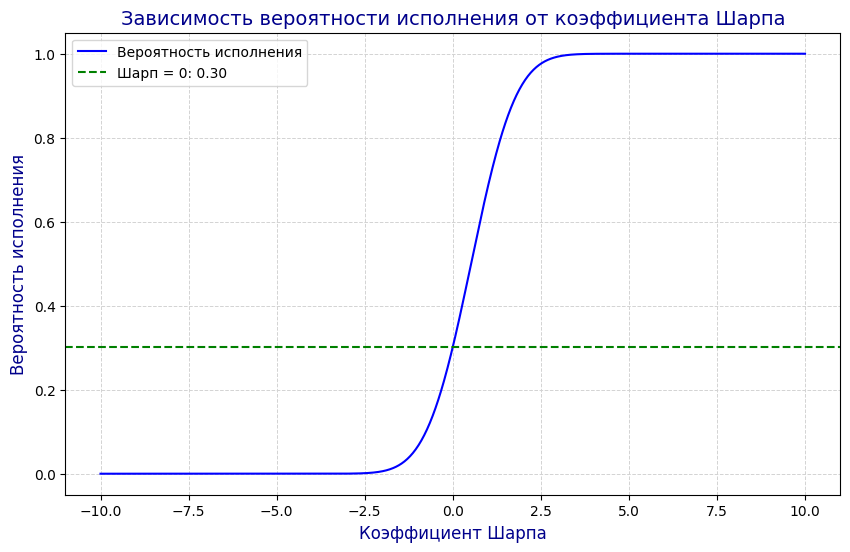

In [31]:
r_current = 0.0  # текущая безрисковая ставка
r = r_current + q  # из коэффициента Шарпа (для случая Sharpe = 0)
d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
probability = norm.cdf(d1)  # вероятность исполнения опциона при Шарпе 0

print(f"Вероятность исполнения опциона при Шарпе 0: {probability:.4f}")

sharpe_values = np.linspace(-10, 10, 1000)
probabilities = []

for sharpe in sharpe_values:
    r = sharpe * sigma + q
    d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    probabilities.append(norm.cdf(d1))

plt.figure(figsize=(10, 6))
plt.plot(sharpe_values, probabilities, color='blue', label="Вероятность исполнения")
plt.axhline(probability, color='green', linestyle='--', label=f"Шарп = 0: {probability:.2f}")
plt.title("Зависимость вероятности исполнения от коэффициента Шарпа", fontsize=14, color='darkblue')
plt.xlabel("Коэффициент Шарпа", fontsize=12, color='darkblue')
plt.ylabel("Вероятность исполнения", fontsize=12, color='darkblue')
plt.grid(color='lightgray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()